import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  

In [2]:
pip install --upgrade pip setuptools certifi

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade requests urllib3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ssl
print(ssl.OPENSSL_VERSION)

OpenSSL 3.0.15 3 Sep 2024


In [76]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [77]:
X_train.shape

(50000, 32, 32, 3)

In [78]:
y_train.shape

(50000, 1)

In [79]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [80]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [81]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [82]:
classes[9]

'truck'

In [83]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

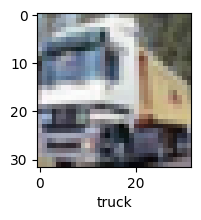

In [84]:
plot_sample(X_train, y_train, 1)

In [85]:
X_train = X_train/255
X_test = X_test/255

In [52]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ANN.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ANN.fit(X_train, y_train, epochs=5)

D:\ComputerVision\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 66ms/step - accuracy: 0.1281 - loss: 2.3008
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.1354 - loss: 2.2997
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.1437 - loss: 2.2990
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.1508 - loss: 2.2981
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.1550 - loss: 2.2969


In [53]:
ANN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1666 - loss: 2.2962


[2.2962090969085693, 0.16660000383853912]

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.25      0.31      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.12      0.95      0.21      1000
           6       0.26      0.05      0.08      1000
           7       0.00      0.00      0.00      1000
           8       0.59      0.11      0.18      1000
           9       0.35      0.30      0.32      1000

    accuracy                           0.17     10000
   macro avg       0.17      0.17      0.11     10000
weighted avg       0.17      0.17      0.11     10000



D:\ComputerVision\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\ComputerVision\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\ComputerVision\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [65]:
CNN = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),                  # ← Flatten goes here
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [66]:
CNN.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [67]:
CNN.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 15ms/step - accuracy: 0.2114 - loss: 2.1355
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2919 - loss: 1.9853
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.3188 - loss: 1.9070
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.3465 - loss: 1.8242
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3673 - loss: 1.7605
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3807 - loss: 1.7276
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3910 - loss: 1.6986
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3991 - loss: 1.6821
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4034 - loss: 1.6682
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4094 - loss: 1.6535


In [68]:
CNN.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4162 - loss: 1.6324


[1.632443904876709, 0.41620001196861267]

In [87]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

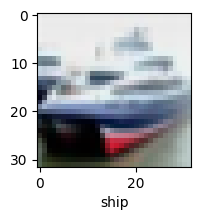

In [88]:
plot_sample(X_test, y_test, 1)